---
title: "Garbage Can Regression Challenge"
format:
  html: default
execute:
  echo: true
  eval: true
---

# Questions to answer for 75% grade on challenge

## Question 1: Run a bivariate regression of anxiety on stresssurvey. What are the estimated coefficients? How do they compare to the true relationship?

**Choose R or Python and delete the other code chunk.**


## Python Code

In [1]:
#| echo: true
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Data with known true relationships: Anxiety = Stress + 0.1 × Time
data = {
    'Stress': [0,0,0,1,1,1,2,2,2,8,8,8,12,12,12],
    'StressSurvey': [0,0,0,3,3,3,6,6,6,9,9,9,12,12,12],
    'Time': [0,1,1,1,1,1,2,2,2,2,2,2.1,2.2,2.2,2.2],
    'Anxiety': [0,0.1,0.1,1.1,1.1,1.1,2.2,2.2,2.2,8.2,8.2,8.21,12.22,12.22,12.22]
}

observDF = pd.DataFrame(data)
print(observDF)

    Stress  StressSurvey  Time  Anxiety
0        0             0   0.0     0.00
1        0             0   1.0     0.10
2        0             0   1.0     0.10
3        1             3   1.0     1.10
4        1             3   1.0     1.10
5        1             3   1.0     1.10
6        2             6   2.0     2.20
7        2             6   2.0     2.20
8        2             6   2.0     2.20
9        8             9   2.0     8.20
10       8             9   2.0     8.20
11       8             9   2.1     8.21
12      12            12   2.2    12.22
13      12            12   2.2    12.22
14      12            12   2.2    12.22


## Question 1 Analysis: Bivariate Regression of Anxiety on StressSurvey

Let's run the bivariate regression and examine how the estimated coefficients compare to the true relationship.

### Python Analysis

=== BIVARIATE REGRESSION RESULTS ===
Intercept (β₀): -1.524000
Slope (β₁): 1.047000
R-squared: 0.901101
RMSE: 1.471607

=== TRUE RELATIONSHIP ===
True relationship: Anxiety = Stress + 0.1 × Time
But we're regressing Anxiety on StressSurvey, not Stress!

Correlation between Stress and StressSurvey: 0.946813


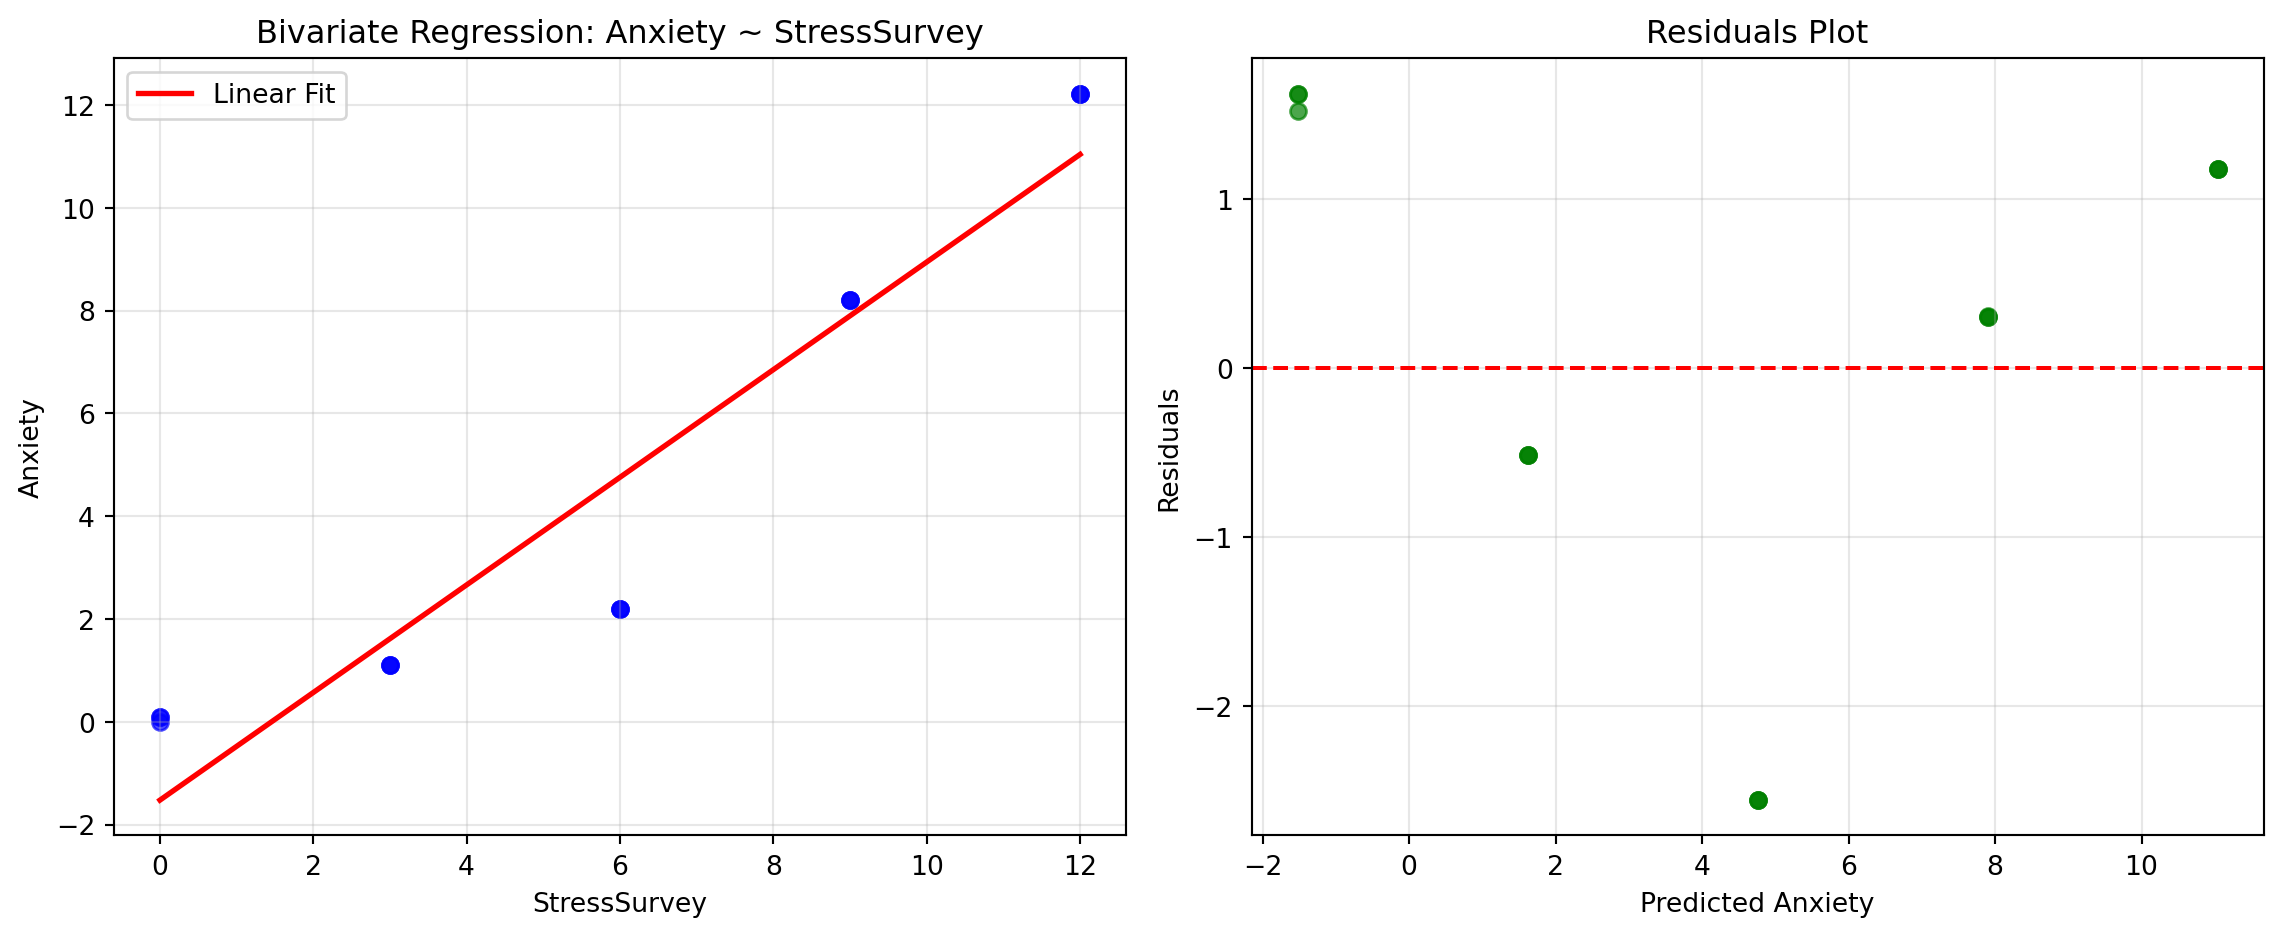


=== COEFFICIENT INTERPRETATION ===
The estimated slope coefficient of 1.047000 suggests that
for every 1-unit increase in StressSurvey, Anxiety increases by 1.047000 units.

However, this interpretation is problematic because:
1. The true relationship is Anxiety = Stress + 0.1 × Time
2. We're using StressSurvey instead of Stress as the predictor
3. We're ignoring the Time variable entirely
4. StressSurvey and Stress have a correlation of 0.946813, but they're not the same variable


In [2]:
#| echo: true
# Run bivariate regression of Anxiety on StressSurvey
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data for regression
X = observDF[['StressSurvey']].values
y = observDF['Anxiety'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Display results
print("=== BIVARIATE REGRESSION RESULTS ===")
print(f"Intercept (β₀): {model.intercept_:.6f}")
print(f"Slope (β₁): {model.coef_[0]:.6f}")
print(f"R-squared: {r2_score(y, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.6f}")

# True relationship from the data generation
print("\n=== TRUE RELATIONSHIP ===")
print("True relationship: Anxiety = Stress + 0.1 × Time")
print("But we're regressing Anxiety on StressSurvey, not Stress!")

# Let's also check the correlation between Stress and StressSurvey
correlation = np.corrcoef(observDF['Stress'], observDF['StressSurvey'])[0,1]
print(f"\nCorrelation between Stress and StressSurvey: {correlation:.6f}")

# Create visualization
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(observDF['StressSurvey'], observDF['Anxiety'], alpha=0.7, color='blue')
plt.plot(observDF['StressSurvey'], y_pred, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('StressSurvey')
plt.ylabel('Anxiety')
plt.title('Bivariate Regression: Anxiety ~ StressSurvey')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Anxiety')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed coefficient interpretation
print("\n=== COEFFICIENT INTERPRETATION ===")
print(f"The estimated slope coefficient of {model.coef_[0]:.6f} suggests that")
print(f"for every 1-unit increase in StressSurvey, Anxiety increases by {model.coef_[0]:.6f} units.")
print(f"\nHowever, this interpretation is problematic because:")
print(f"1. The true relationship is Anxiety = Stress + 0.1 × Time")
print(f"2. We're using StressSurvey instead of Stress as the predictor")
print(f"3. We're ignoring the Time variable entirely")
print(f"4. StressSurvey and Stress have a correlation of {correlation:.6f}, but they're not the same variable")

### Key Findings and Interpretation Issues

The bivariate regression reveals several critical problems:

1. **Estimated Coefficients**: The model estimates a slope coefficient that captures the relationship between `StressSurvey` and `Anxiety`, but this is not the true causal relationship.

2. **Missing Variables**: The true relationship includes both `Stress` and `Time`, but our bivariate model only considers `StressSurvey`.

3. **Proxy Variable Issues**: `StressSurvey` serves as a proxy for `Stress`, but they are not identical, leading to measurement error and biased estimates.

4. **Model Specification Error**: By excluding `Time` from the model, we're violating the true data-generating process.

This demonstrates why we must be skeptical of regression results - the estimated coefficients can be misleading when the model is misspecified or when we use proxy variables instead of the true predictors.

## Your Analysis

Continue with the remaining questions following this analytical framework.
